# IRIS DATASET With AdaBoost
### Problem Statement:-
The target variable comprises of 3 different species of iris flower. Our motive is to classify the three different classes with the help of given features using Machine Learning Algorithms.

### Dataset Information:-
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: Type of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

### Attribute Information:-
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

**class:**
*  Iris Setosa
*  Iris Versicolour
*  Iris Virginica

### We will be implementing the following steps to achieve the final result:-
* Importing the necessary Libraries.
* Importing the Dataset.
* Exploratory Data Analysis.
* Dividing the data into test and train datasets.
* Building the model.
* Evaluating the performance.

###  Import Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

### Loading IRIS Dataset

In [67]:
iris_data=pd.read_csv("E:/dataset/iris.csv")

### View the Dataset

In [68]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratary Data Analysis

It is common for data scientists to spend a majority of their time exploring and cleaning data, but approaching this as an opportunity to invest in your model (instead of viewing it as just another chore on your to-do list) will yield big dividends later on in the data science process.

Performing thorough exploratory data analysis (EDA) and cleaning the dataset are not only essential steps, but also a great opportunity to lay the foundation for a strong machine learning model.



In [69]:
# Deleting Id variable from the dataset

del iris_data['Id']

In [70]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Shape of dataset

In [71]:
# Shape of dataset
iris_data.shape
#iris_data.size

(150, 5)

#### Describing the Dataset

In [72]:
iris_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So all variable has 150 values we can conclude following information:

* Iris Flower sepal length ranges from 4.3 to 7.9 cm and the average length is 5.8 cm.
* Irsi Flower sepal width ranges from 2 to 4.4 cm and the average width is 3.05 cm.
* Iris Flower petal length ranges from 1 to 5.1 cm and the average length is 3.75 cm.
* Iris Flower petal width ranges from 0.1 to 2.5 cm and the average width is 1.19 cm.
* There are three different Species of Iris Flower.



In [73]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [74]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

so there is no null values in this dataset.

In [75]:
iris_data['Species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [44]:
np.unique(iris_data['Species'], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [76]:
iris_data.groupby('Species').count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


From the above table we can see that there are three type of species in irirs dataset. 
* Iris setosa
* Iris versicolor
* Iris Virginica

all the three class have 50 observation so this dataset is balanced.


### Visualising the data using seaborn library:-
There are different types of plots like bar plot, box plot, scatter plot etc.

Scatter plot is very useful when we are analyzing the relation ship between 2 features on x and y axis.

In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.



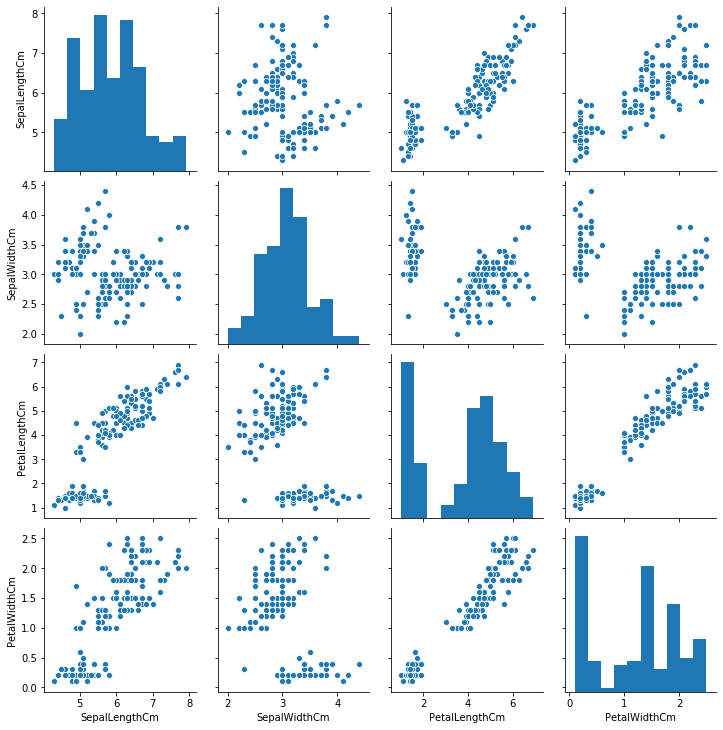

In [77]:
# Using Pair plot we can visualize relationship between of all the numeric features with each other.
sns.pairplot(iris_data)

From the above diagram we can see that
* sepal length have linear relation with petal length.
* sepal length have linear relation with petal width.
* petal length have linear relation with petal width.

### Visualising the Heatmap

In [80]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


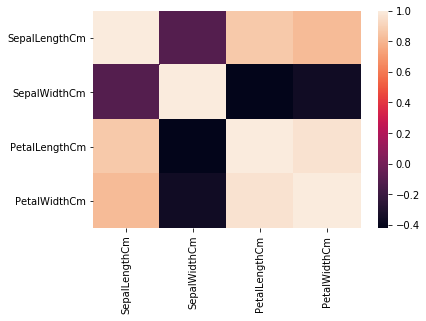

In [79]:
sns.heatmap(iris_data.corr())

From Correlation matrix we can conclude that
1. sepal length have high correlation with petal length and petal width.
2. petal length have high correlation with petal width.


### Visualising the Violin Map

In [100]:
min_Sep_len1=iris_data.query('Species=="Iris-setosa"')['SepalLengthCm'].min()
max_Sep_len1=iris_data.query('Species=="Iris-setosa"')['SepalLengthCm'].max()
min_Sep_len2=iris_data.query('Species=="Iris-versicolor"')['SepalLengthCm'].min()
max_Sep_len2=iris_data.query('Species=="Iris-versicolor"')['SepalLengthCm'].max()
min_Sep_len3=iris_data.query('Species=="Iris-virginica"')['SepalLengthCm'].min()
max_Sep_len3=iris_data.query('Species=="Iris-virginica"')['SepalLengthCm'].max()

In [101]:
iris_Species=pd.DataFrame([{'Species':'Iris-setosa','min_Sep_len':min_Sep_len1,'max_sep_len':max_Sep_len1},
                         {'Species':'Iris-versicolor','min_Sep_len':min_Sep_len2,'max_sep_len':max_Sep_len2},
                         {'Species':'Iris-virginica','min_Sep_len':min_Sep_len3,'max_sep_len':max_Sep_len3}])

In [102]:
iris_Species

,Species,min_Sep_len,max_sep_len
0,Iris-setosa,4.3,5.8
1,Iris-versicolor,4.9,7.0
2,Iris-virginica,4.9,7.9


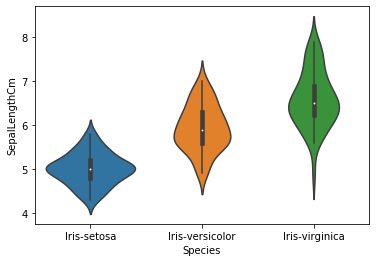

In [82]:
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_data)

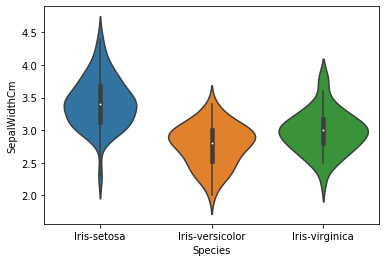

In [103]:
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_data)

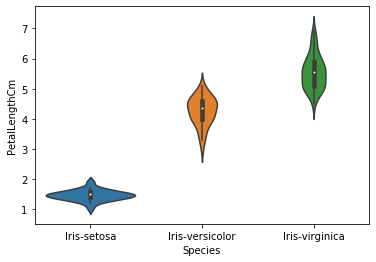

In [104]:
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_data)

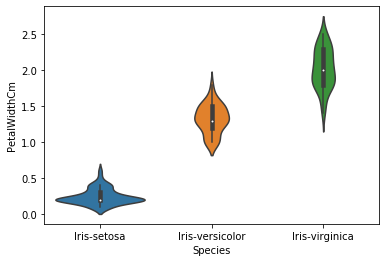

In [105]:
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_data)

### Breaking the dataset into feature and target variables:-

In [110]:
iris_data_x=iris_data.iloc[:,:-1]
iris_data_y=iris_data.iloc[:,-1]

### Dividing the data into train and test data:-

In [118]:
train_x,test_x,train_y,test_y =train_test_split(iris_data_x,iris_data_y,test_size=0.2)

In [125]:
train_x.shape

(120, 4)

In [126]:
test_x.shape

(30, 4)

In [127]:
train_y.shape

(120,)

In [128]:
test_y.shape

(30,)

### Training the model with Decision Tree as base estimator:-

In [146]:
model=AdaBoostClassifier(n_estimators=100)

In [147]:
model.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

### Predict the model

In [148]:
pred_y=model.predict(test_x)

### Evaluate the Model

In [149]:
model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [150]:
model.score(test_x,test_y)

0.9

In [151]:
confusion_matrix(test_y,pred_y)

array([[11,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  8]], dtype=int64)

### Training the model with SVC as base estiamtor:-

In [160]:

svc=SVC(probability=True, kernel='linear')
model2=AdaBoostClassifier(base_estimator=svc,n_estimators=50)

In [161]:
model2.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='linear',
                                      max_iter=-1, probability=True,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=1.0, n_estimators=50, random_state=None)

In [162]:
pred2_y=model2.predict(test_x)

In [163]:
model2.score(test_x,test_y)

0.9666666666666667

In [165]:
confusion_matrix(test_y,pred2_y)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)